In [8]:
from scripts import Diatom

In [9]:
diatom = Diatom("iLB1027_lipid.xml", "DM")

'R_AAL(fum)_c' is not a valid SBML 'SId'.
'R_sink_Asn-X-Ser_Thr_c' is not a valid SBML 'SId'.


## Polytope Sampling

In [10]:
def polytope_pipeline(reactions: tuple[str, str], n_angles: int = 360, delta: float = 0.01, n_clusters: int = 20):
    diatom.set_objective_functions({reactions[1]: 1.0})
    diatom.analyze.project_polytope_2d(reactions, n_angles = n_angles)
    diatom.grid.sample_polytope(delta = delta)
    diatom.grid.debug_plot(delta = delta)
    diatom.analyze.qualitative_analysis(only_load=False)
    diatom.clustering.set_grid_clusters('hierarchical', k = n_clusters)
    diatom.plot.sampled_polytope(show_boundary=True)


def analyze_reactions(reaction_list1: list[str], reaction_list2: list[str], n_angles: int = 360, delta: float = 0.0125) -> None:
    for reaction1 in reaction_list1:
        for reaction2 in reaction_list2:
            polytope_pipeline((reaction1, reaction2), n_angles = n_angles, delta = delta)


Maximize
1.0*DM_biomass_c - 1.0*DM_biomass_c_reverse_c49c1


/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


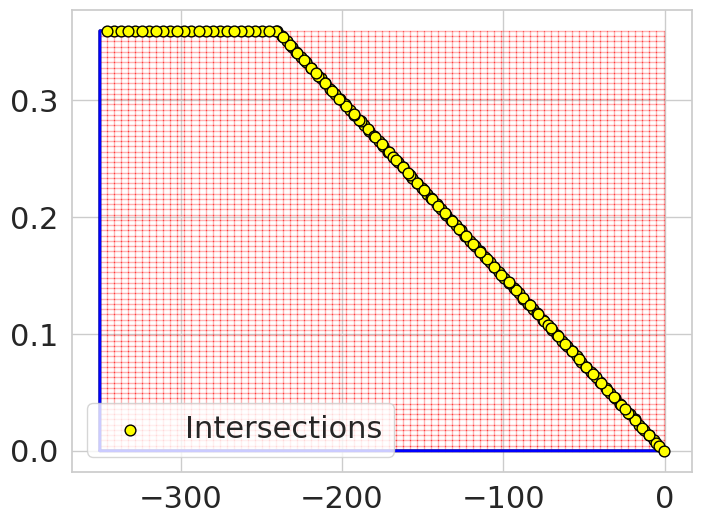

Running qualitative fva over grid feasible points...
No reactions previously selected for FVA and clustering!
Setting reactions for analysis...

Analyzing point feasibility....


100%|██████████| 4462/4462 [00:04<00:00, 906.09it/s] 


Done!



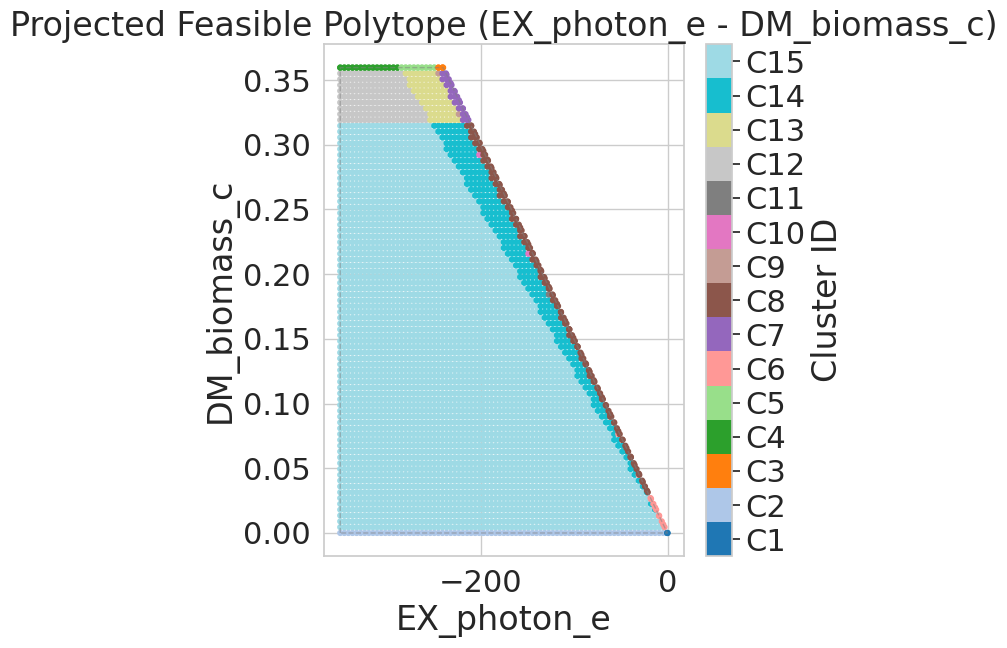

In [11]:
#reactions1 = ["EX_co2_e"]
#reactions1 = ["EX_no3_e"]
reactions1 = ["EX_photon_e"]

#reactions2 = ["RUBISO_h"]
#reactions2 = ["RUBISC_h"]
reactions2 = ["DM_biomass_c"]

diatom.modify_bounds({"EX_photon_e": (-350, 0)})

analyze_reactions(reactions1, reactions2)


## Cluster Analysis

In [12]:
def clustering_pipeline(reaction_list, threshold=0.8, changing=False):
    
    print("Qualitative Profiles "+"="*80+"\n")
    qualitative_df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=threshold, changing=changing, selected_reactions=reaction_list)
    display(qualitative_df)

    print("Per Reaction Metrics "+"="*80+"\n")
    cluster_metrics_per_reaction_df = diatom.clustering.get_cluster_metrics_per_reaction(reaction_list)
    display(cluster_metrics_per_reaction_df)

    print("Global Metrics "+"="*80+"\n")
    cluster_global_metrics_df = diatom.clustering.get_cluster_global_metrics(reaction_list)
    display(cluster_global_metrics_df)

In [13]:
REACTIONS = [
    # BIOMASS
    "DM_biomass_c",
    
    # EXCHANGE
    "EX_co2_e",
    "EX_o2_e",
    "EX_h2o_e",
    "EX_co_e", 
    "EX_no3_e",
    "EX_photon_e",
    
    # CHLOROPLAST
    "ATPS_h",
    "ATPM_h",
    "GLNA_h",
    "GLTS_h",
    "ACCOAC_h",
    "ACOATA_h",
    "NTRIR_h",
    "PSII_u",
    "FNOR_h",
    "GDR_NADP_h",
    "RUBISO_h",
    "RUBISC_h", 
    "DXPS_h",
    #"MEHLER_h",

    # MITOCHONDRIA
    "ATPS_m",
    "ATPM_m",
    "GLNA_m",
    "GLTS_m",
    "THD2_m",
    "GLUDH2_m",
    #"AGAS_m",

    # CYTOSOL
    "ATPS_c",
    "TAGAH_HDE_ARA_ARA_c",
    "ACOADAGAT_EPA_EPA_EPA_c",
    "ACOADAGAT_HDE_ARA_ARA_c",
    "NOR_c",
    "PAPA_EPA_EPA_c",
    "NITR_c",
    "HISD_c",
]

clustering_pipeline(REACTIONS)

Qualitative Profiles ================================================================================

cluster_dfs len: 15
Skipping existing file: Qualitative_profiles_NR34_Delta0.0125.csv


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
DM_biomass_c,0,0,+,+,+,+,+,+,+,+,+,+,+,+,+
EX_co2_e,0,-0,--,--,--,--,--,--,--,--,--,--,--,--,--
EX_o2_e,0,0+,++,++,++,++,++,++,++,++,++,++,++,++,++
EX_h2o_e,0,-0,--,--,--,--,--,--,--,--,--,--,--,--,--
EX_co_e,0,0+,0,0,0,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+
EX_no3_e,-0,-0,-,-,-,--,--,--,--,--,--,--,--,--,--
EX_photon_e,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
ATPS_h,+,++,++,++,++,++,++,++,++,++,++,++,++,++,++
ATPM_h,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+
GLNA_h,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+,0+


Per Reaction Metrics ================================================================================

Skipping existing file: Metrics_per_reaction_NR34_Delta0.0125_M12.csv


,reaction_id,cluster,metric,value
0,DM_biomass_c,1,minimum,0.000000
1,DM_biomass_c,1,maximum,0.000000
2,DM_biomass_c,1,mean_range,0.000000
3,DM_biomass_c,1,mean_midpoint,0.000000
4,DM_biomass_c,1,mean_relative_range,0.000000
...,...,...,...,...
7135,HISD_c,15,frac_zero_fixed,0.000000
7136,HISD_c,15,frac_bidirectional,0.000000
7137,HISD_c,15,mean_abs_flux,24.398435
7138,HISD_c,15,std_range,6.432822


Global Metrics ================================================================================

Skipping existing file: Global_metrics_NR34_Delta0.0125_M12.csv


,cluster,metric,value
0,1,no3_to_co2_capacity_ratio,1.000000
1,1,no3_per_N_biomass_ratio,1.000000
2,1,no3_per_N_biomass_sum,0.880000
3,1,co2_per_C_biomass_ratio,0.000000
4,1,co2_per_C_biomass_sum,0.000000
...,...,...,...
175,15,no3_per_rubisc_midpoint_median,-1.015249
176,15,co2_per_rubisc_midpoint_median,-1.411559
177,15,mean_range_all_reactions,148.214146
178,15,std_range_all_reactions,244.314378


In [ ]:
grid_x = [-50, -100, -150, -175]
grid_y = [0.3, 0.2, 0.1]

reaction_couplings = [
    ('EX_co2_e', 'RUBISC_h'),
    ('EX_o2_e', 'RUBISO_h'),
    ("RUBISC_h", "RUBISO_h"),
    ("EX_no3_e", "NTRIR_h")
]

for coupling in reaction_couplings:
    diatom.analyze.quan_FCA(grid_x, grid_y, coupling)
    diatom.plot.plot_qFCA()

Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
